# Booking Reservations Classification Project
Predicting possible cancellation of the booking

In [41]:
import pandas as pd
import numpy as np

In [42]:
data = pd.read_csv('CourseData.csv')

In [43]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [44]:
print('Row count of our data is {}, and there are {} columns.'.format(data.shape[0], data.shape[1]))

Row count of our data is 36275, and there are 19 columns.


## 1. Data Analysis

In [45]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [46]:
# for alternative we can always use below
#data[data['no_of_previous_cancellations'] == data['no_of_previous_cancellations'].max()]


data.iloc[data['no_of_previous_cancellations'].idxmax()]

Booking_ID                                 INN12098
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              1
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                       190
arrival_year                                   2018
arrival_month                                     4
arrival_date                                      9
market_segment_type                         Offline
repeated_guest                                    1
no_of_previous_cancellations                     13
no_of_previous_bookings_not_canceled              1
avg_price_per_room                             70.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 12097,

In [47]:
#data[data['no_of_previous_cancellations'] == data['no_of_previous_cancellations'].min()]

data.iloc[data['no_of_previous_cancellations'].idxmin()]

Booking_ID                                  INN00001
no_of_adults                                       2
no_of_children                                     0
no_of_weekend_nights                               1
no_of_week_nights                                  2
type_of_meal_plan                        Meal Plan 1
required_car_parking_space                         0
room_type_reserved                       Room_Type 1
lead_time                                        224
arrival_year                                    2017
arrival_month                                     10
arrival_date                                       2
market_segment_type                          Offline
repeated_guest                                     0
no_of_previous_cancellations                       0
no_of_previous_bookings_not_canceled               0
avg_price_per_room                              65.0
no_of_special_requests                             0
booking_status                          Not_Ca

In [48]:
#data[data['avg_price_per_room'] == data['avg_price_per_room'].max()]

data.iloc[data['avg_price_per_room'].idxmax()]

Booking_ID                                 INN33115
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              0
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                        35
arrival_year                                   2018
arrival_month                                     3
arrival_date                                     25
market_segment_type                         Offline
repeated_guest                                    0
no_of_previous_cancellations                      0
no_of_previous_bookings_not_canceled              0
avg_price_per_room                            540.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 33114,

In [49]:
#data[data['avg_price_per_room'] == data['avg_price_per_room'].min()]
data.iloc[data['avg_price_per_room'].idxmin()]

Booking_ID                                   INN00064
no_of_adults                                        1
no_of_children                                      0
no_of_weekend_nights                                0
no_of_week_nights                                   1
type_of_meal_plan                         Meal Plan 1
required_car_parking_space                          0
room_type_reserved                        Room_Type 1
lead_time                                           2
arrival_year                                     2017
arrival_month                                       9
arrival_date                                       10
market_segment_type                     Complementary
repeated_guest                                      0
no_of_previous_cancellations                        0
no_of_previous_bookings_not_canceled                0
avg_price_per_room                                0.0
no_of_special_requests                              1
booking_status              

In [50]:
#check for null values 
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [51]:
#check for duplicates
data.duplicated().sum()

0

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data['no_of_children'].value_counts().sort_values(ascending=True)

10        1
9         2
3        19
2      1058
1      1618
0     33577
Name: no_of_children, dtype: int64

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

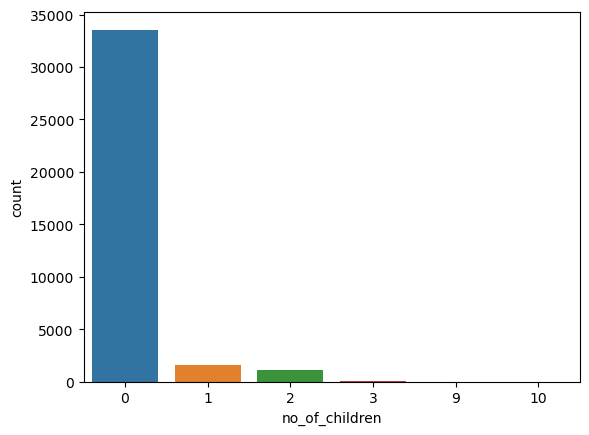

In [54]:
sns.countplot(data=data, x='no_of_children')

In [55]:
data['type_of_meal_plan'].value_counts().sort_values(ascending=True)

Meal Plan 3         5
Meal Plan 2      3305
Not Selected     5130
Meal Plan 1     27835
Name: type_of_meal_plan, dtype: int64

In [56]:
mealtypelabels = data['type_of_meal_plan'].unique()
mealtypelabels

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

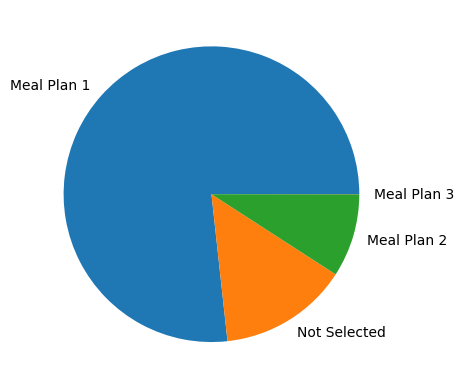

In [57]:
plt.pie(data['type_of_meal_plan'].value_counts(), labels=mealtypelabels)
plt.show()

In [58]:
data['room_type_reserved'].value_counts().sort_values(ascending=False)

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

<AxesSubplot:xlabel='room_type_reserved', ylabel='count'>

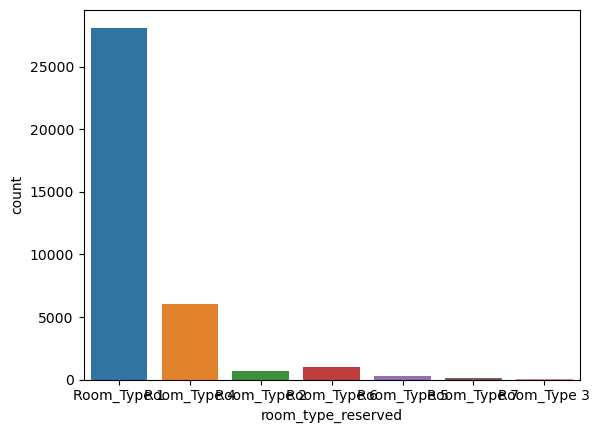

In [59]:
sns.countplot(data=data, x='room_type_reserved')

In [60]:
data['required_car_parking_space'].value_counts().sort_values(ascending=False)

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

<AxesSubplot:xlabel='required_car_parking_space', ylabel='count'>

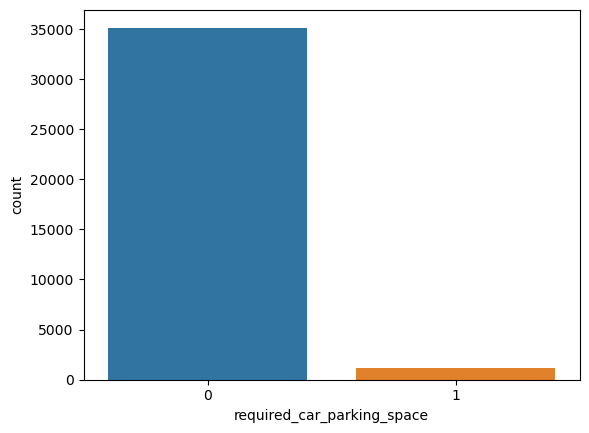

In [61]:
sns.countplot(data=data, x='required_car_parking_space')

In [62]:
data['booking_status'].value_counts().sort_values(ascending=False)

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

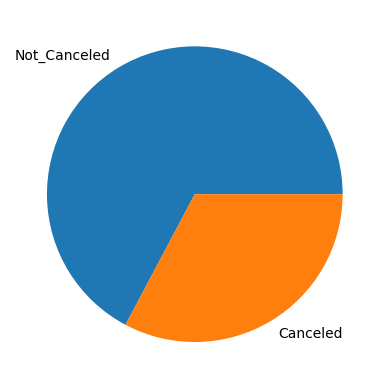

In [63]:
bookinglabels = data['booking_status'].unique()
plt.pie(data['booking_status'].value_counts(),labels=bookinglabels)
plt.show()

In [64]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [65]:
# keep the features that are interesting for us presently
data = data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan','room_type_reserved','no_of_previous_cancellations','avg_price_per_room', 'booking_status']]
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,no_of_previous_cancellations,avg_price_per_room,booking_status
0,2,0,1,2,Meal Plan 1,Room_Type 1,0,65.00,Not_Canceled
1,2,0,2,3,Not Selected,Room_Type 1,0,106.68,Not_Canceled
2,1,0,2,1,Meal Plan 1,Room_Type 1,0,60.00,Canceled
3,2,0,0,2,Meal Plan 1,Room_Type 1,0,100.00,Canceled
4,2,0,1,1,Not Selected,Room_Type 1,0,94.50,Canceled
...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,Room_Type 4,0,167.80,Not_Canceled
36271,2,0,1,3,Meal Plan 1,Room_Type 1,0,90.95,Canceled
36272,2,0,2,6,Meal Plan 1,Room_Type 1,0,98.39,Not_Canceled
36273,2,0,0,3,Not Selected,Room_Type 1,0,94.50,Canceled


## 2. Feature Engineering and Machine Learning

In [67]:
#we transform catergorical columns into numerical
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [70]:
data['type_of_meal_plan'].head()

0     Meal Plan 1
1    Not Selected
2     Meal Plan 1
3     Meal Plan 1
4    Not Selected
Name: type_of_meal_plan, dtype: object

In [78]:
data['type_of_meal_plan'] = labelencoder.fit_transform(data['type_of_meal_plan'])
data['room_type_reserved'] = labelencoder.fit_transform(data['room_type_reserved'])
data['booking_status'] = labelencoder.fit_transform(data['booking_status'])

C:\Users\geopa\AppData\Local\Temp\ipykernel_1108\1954494488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_meal_plan'] = labelencoder.fit_transform(data['type_of_meal_plan'])
C:\Users\geopa\AppData\Local\Temp\ipykernel_1108\1954494488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['room_type_reserved'] = labelencoder.fit_transform(data['room_type_reserved'])
C:\Users\geopa\AppData\Local\Temp\ipykernel_1108\1954494488.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [80]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,no_of_previous_cancellations,avg_price_per_room,booking_status
0,2,0,1,2,0,0,0,65.00,1
1,2,0,2,3,3,0,0,106.68,1
2,1,0,2,1,0,0,0,60.00,0
3,2,0,0,2,0,0,0,100.00,0
4,2,0,1,1,3,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,3,0,167.80,1
36271,2,0,1,3,0,0,0,90.95,0
36272,2,0,2,6,0,0,0,98.39,1
36273,2,0,0,3,3,0,0,94.50,0


In [83]:
#next, we study correlations

data.corr()['booking_status'].sort_values(ascending=True)

avg_price_per_room             -0.142569
no_of_week_nights              -0.092996
no_of_adults                   -0.086920
no_of_weekend_nights           -0.061563
no_of_children                 -0.033078
type_of_meal_plan              -0.026706
room_type_reserved             -0.022986
no_of_previous_cancellations    0.033728
booking_status                  1.000000
Name: booking_status, dtype: float64

<AxesSubplot:>

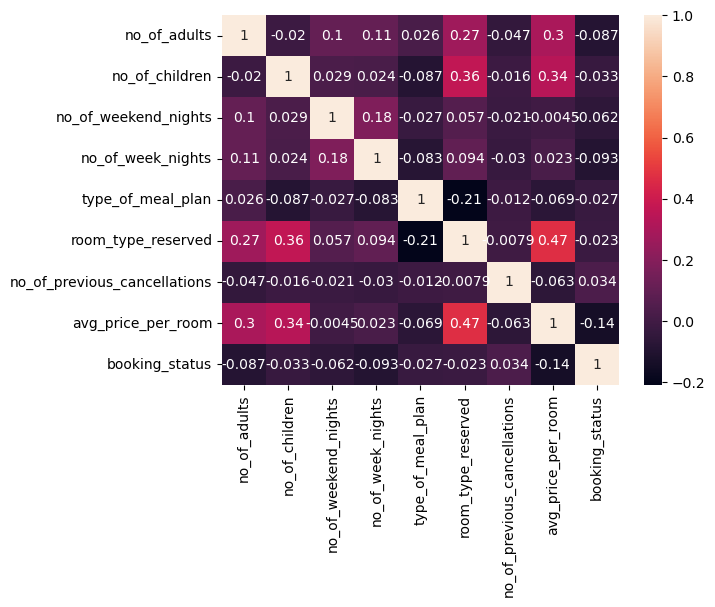

In [84]:
sns.heatmap(data=data.corr(), annot=True)

In [85]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'room_type_reserved',
       'no_of_previous_cancellations', 'avg_price_per_room', 'booking_status'],
      dtype='object')

In [93]:
X = data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'room_type_reserved', 'no_of_previous_cancellations', 'avg_price_per_room']]
y = data[['booking_status']]

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [96]:
from sklearn.metrics import accuracy_score

def modelresults(predictions):
    print('Accuracy score of the model is {}'.format(accuracy_score(y_test, predictions)))

In [97]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [101]:
log_predictions = log_model.predict(scaled_X_test)
modelresults(log_predictions)

Accuracy score of the model is 0.6715060185610585


In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps=[('knn', knn)])
param_grid = {'knn__n_neighbors' : k_values}
cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
cv_classifier.fit(scaled_X_train, y_train)

print(cv_classifier.best_params_)                

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

{'knn__n_neighbors': 3}


C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [111]:
pred_gridknn = cv_classifier.predict(scaled_X_test)
modelresults(pred_gridknn)

Accuracy score of the model is 0.6976936506477993


In [113]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()
n_estimators = [23, 64, 128]
max_features = [2, 3]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfr = {'n_estimators' : n_estimators, 'max_features' : max_features, 'bootstrap' : bootstrap, 'oob_score' : oob_score}
grid_rfr = GridSearchCV(rfr_model, param_grid_rfr)
grid_rfr.fit(scaled_X_train, y_train)
print(grid_rfr.best_params_)

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs d

{'bootstrap': True, 'max_features': 3, 'n_estimators': 64, 'oob_score': True}


In [117]:
# Best params are {'bootstrap': True, 'max_features': 3, 'n_estimators': 64, 'oob_score': True}

predsrfc = grid_rfr.predict(scaled_X_test)
modelresults(predsrfc)

Accuracy score of the model is 0.6857484149591105


## 3. Test

In [129]:
print(X.describe())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       type_of_meal_plan  room_type_reserved  no_of_previous_cancellations  \
count       36275.000000        36275.000000                  36275.000000   
mean            0.515644            0.708890                      0.023349   
std             1.048131            1.399851 

In [130]:
import numpy as np
new_customer = np.array([2, 1, 1, 2, 1, 1, 0, 110])

In [131]:
def cancellation_prediction(new_customer):
    predictions = cv_classifier.predict(new_customer.reshape(1,-1))
    if predictions == 1:
        return "will not cancel"
    else:
        return "will cancel"

In [132]:
print("This customer {} the booking, according to the K Nearest Neighbours model".format(cancellation_prediction(new_customer)))

This customer will not cancel the booking, according to the K Nearest Neighbours model
